# Rishabh Agrawal
# Assignment 4

# Libraries

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from sklearn.utils import shuffle
import sklearn.linear_model as Lm
from sklearn.linear_model import LinearRegression as Lr
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import pycountry_convert as pc
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# Problem 1

In [4]:
p1 = pd.read_table("Files/Sdf16_1a.txt")

C:\Users\risha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
totalFed = p1['TFEDREV'].sum()
print("Total Federal Budget = ", totalFed)
print("Amount to cut i.e. 15% of Total Budget = ", 0.15 * totalFed)
print("Total amount left for the new Budget = ", 0.85 * totalFed)

Total Federal Budget =  55602739138
Amount to cut i.e. 15% of Total Budget =  8340410870.7
Total amount left for the new Budget =  47262328267.299995


In [23]:
def makeEqualBudget(df, cutPercent, total):
    amountCut = (cutPercent/100) * total
    ans = [0]*len(df)
    newsum = 0
    for i in range(len(df)):
        if (df['AmountLeft'][i]  > 0):
            newsum += df['AmountLeft'][i]
    cutPercent = amountCut/newsum
    
    for i in range(len(df)):
        if (amountCut == 0):
            break
        if (df['AmountLeft'][i] > 0):
            ans[i] = cutPercent * df['AmountLeft'][i]
            amountCut -= ans[i] 

    return amountCut, ans
            

In [123]:
p4 = p1
p4 = p4.fillna(0)
p4['AmountLeft'] = p1['TOTALREV'] - p1['TOTALEXP']
amountLeft, p4['Federal Amount Cut'] = makeEqualBudget(p4, 15, totalFed)
p4['Got Budget Cut'] = (p4['Federal Amount Cut'] > 0)
p4['Cut Proportion From Total'] = p4['Federal Amount Cut'] / p1['TOTALREV']
p41 = p4[['LEAID','NAME', 'STNAME','Federal Amount Cut', 'Cut Proportion From Total', 'TOTALREV', 'Got Budget Cut']].sort_values('Cut Proportion From Total', ascending=False)
p41.fillna(0, inplace = True)

Text(0,0.5,'Count')

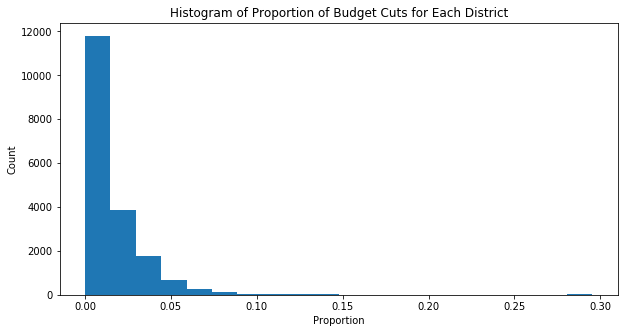

In [292]:
plt.figure(figsize=(10,5))
plt.hist(p41['Cut Proportion From Total'],  bins = 20)
plt.title("Histogram of Proportion of Budget Cuts for Each District")
plt.xlabel("Proportion")
plt.ylabel('Count')

We can see that majority of the budget cuts are proportionally in the low range i.e. less than 0.15

In [68]:
p41.head(25)

,LEAID,NAME,STNAME,Federal Amount Cut,Cut Proportion From Total,TOTALREV
15896,4800191,NORTHWEST PREPARATORY,Texas,5.908030e+02,0.295402,2000
15838,4800091,CHILDREN FIRST ACADEMY OF DALLAS,Texas,4.342402e+04,0.295402,147000
10134,3400059,Galloway Community Charter School,New Jersey,8.359863e+04,0.295402,283000
10136,3400062,Educational Information and Resource Center,New Jersey,1.713329e+04,0.295402,58000
10142,3400075,Central Jersey Arts Charter School,New Jersey,1.010273e+05,0.295402,342000
345,400206,Desert Springs Academy,Arizona,1.562674e+05,0.295402,529000
12944,3901570,Citizens Academy Southeast,Ohio,4.428069e+05,0.295402,1499000
15791,4800023,IGNITE PUBLIC SCHOOLS AND COMMUNITY SERVICE CE...,Texas,2.954015e+02,0.295402,1000
15956,4800291,WINDHAM SCHOOL DISTRICT,Texas,9.461710e+05,0.295402,3203000
12352,3800395,ROUGHRIDER AREA CAREER & TECHNICAL CENTER,North Dakota,1.078216e+05,0.295402,365000


These are the top 25 districts which are affected the most by the budget cuts because they lost around 30-20% of there total budget becaus eof the budget cuts

# Problem 2

In [280]:
p2 = pd.read_csv("Files/ccd_lea_052_1516_w_1a_011717.csv")
p2['LEAID'] = p2['LEAID'].astype(object)
p41['LEAID'] = p41['LEAID'].astype(object)

In [281]:
p2merged = pd.merge(left = p2, right = p41, left_on = "LEA_NAME", right_on = "NAME")
p2merged = p2merged[p2merged['TOTAL'] != -1]

In [282]:
races = {
    'AM' : 'American Indian/Alaska Native',
    'AS' : 'Asian',
    'HI' : 'Hispanic',
    'BL' : 'Black',
    'WH' : 'White',
    'HP' : 'Hawaiian Native / Pacific Islander',
    'TR' : 'Two or More Races'
}

In [283]:
for i in races:
    p2merged['p-'+i] = abs(p2merged[i]/p2merged['TOTAL']).fillna(0)

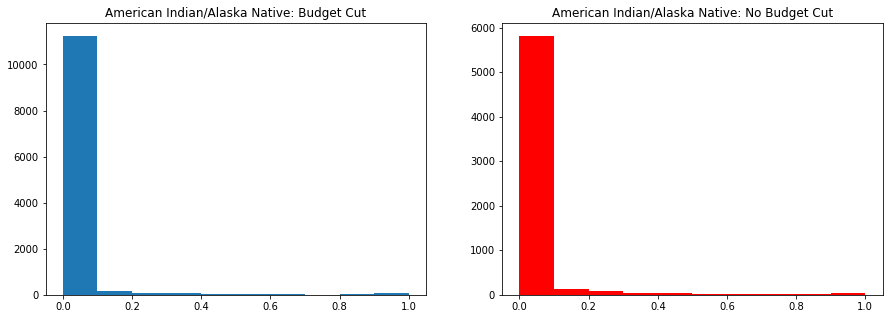

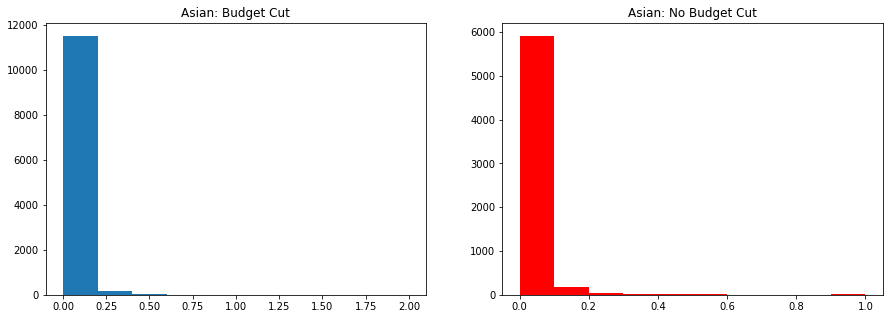

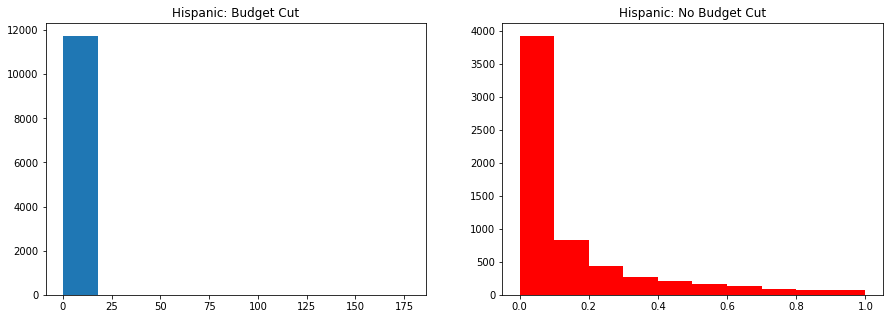

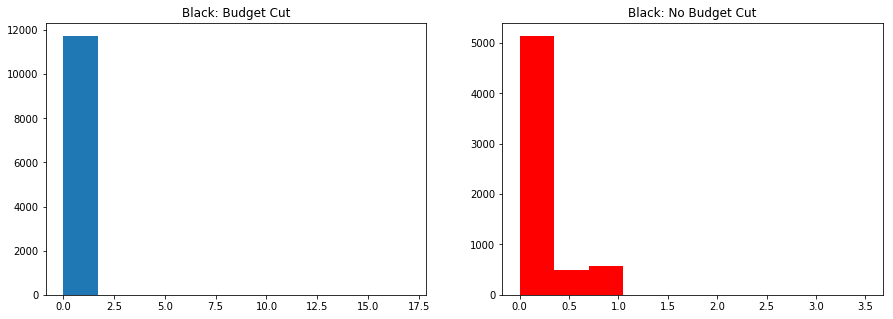

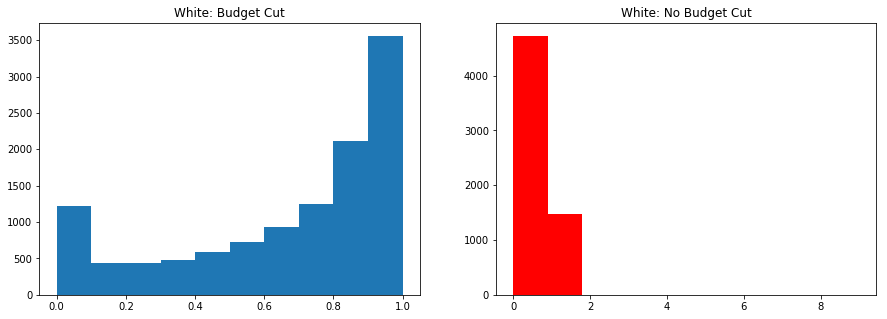

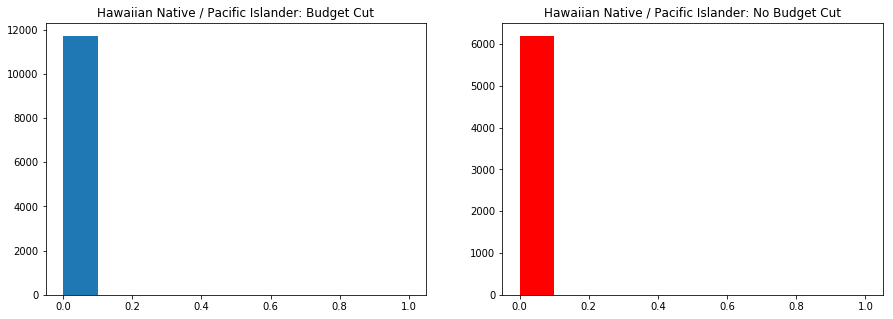

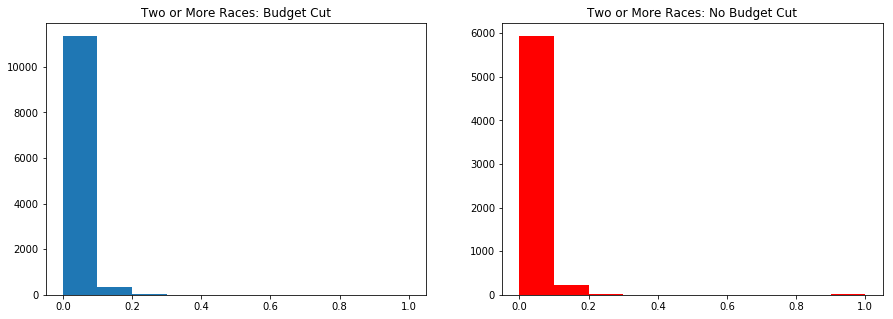

In [284]:
for i in races:
    fig, axs = plt.subplots(ncols=2,figsize=(15,5))
    axs[0].hist(p2merged[p2merged['Got Budget Cut'] == True]['p-'+i])
    axs[1].hist(p2merged[p2merged['Got Budget Cut'] == False]['p-'+i], color = 'Red')
    axs[0].set_title(races[i] + ': Budget Cut')
    axs[1].set_title(races[i] + ': No Budget Cut')
    plt.show()

# Problem 3

In [271]:
p3 = pd.read_csv("Files/ccd_lea_002089_1516_w_1a_011717.csv")

In [272]:
p3 = p3[p3['SPECED'] > 0]
p3merged = pd.merge(left = p3, right = p41, left_on = "LEA_NAME", right_on = "NAME")
p3merged = pd.merge(left = p3merged, right = p2, left_on = "LEA_NAME", right_on = "LEA_NAME")
p3merged = p3merged[p3merged['TOTAL'] > 0]

In [273]:
p3merged['p-disability'] = (p3merged['SPECED'] / p3merged['TOTAL']).fillna(0.5)
p3merged = p3merged[p3merged['p-disability'] < 1.0]

Text(0.5,1,'Proportion of Children with Disability for Each District')

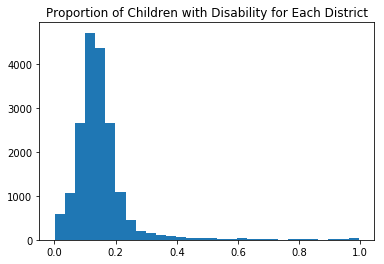

In [277]:
plt.hist(p3merged['p-disability'], bins = 30)
plt.title('Proportion of Children with Disability for Each District')

Text(0.5,1,'Children With Disability: No Budget Cut')

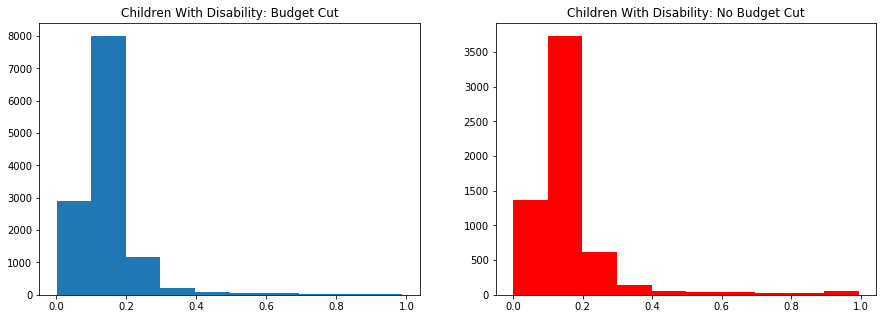

In [278]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].hist(p3merged[p3merged['Got Budget Cut'] == True]['p-disability'])
axs[1].hist(p3merged[p3merged['Got Budget Cut'] == False]['p-disability'], color = 'Red')
axs[0].set_title('Children With Disability' + ': Budget Cut')
axs[1].set_title('Children With Disability'+ ': No Budget Cut')

# Problem 4

I choose to critique the the HW3 of this github repository : https://github.com/alefiya-naseem/DataVizHw3

They chose to do the budget cut on schools who were making more money then they were spending. Actually there approach is very similar to mine where they only chose the schools whose revenue was more then there expenditure, as taking only the excess money away wont harm the current functioning of that school. Then rather than cutting equal amount of money from all the districts with excess funds, they decided to cut funding proportionally to the money they have. The districts with more money get more money cut off then the district with less money.
I think this is a very justified way of cutting the money because the district with less money will have more money remaining for them this way, whereas cutting 15% from all would have been fair but wouldnt have been justified which is what I did.
So I think this way handles the problem very well, not affecting the workings of exisitng districts budgets. Only thing this would impact is that in an event, where a big district goes into debt, they wont have enough funds to recover as it has been already cut, whereas smaller districts might still recover.

# Problem 5